## Gamera Task 3

3a. You have electrons with energies between 1 and 100 TeV. Assuming a 1 mG magnetic field and the CMB, in what energy range do these electrons dominate the synchrotron and IC emission, respectively?

3b. What about protons in this energy range?

In [2]:
import sys
sys.path.append('/lfs/l7/hawc/users/gschwefer/software/GAMERA/lib')
import gappa as gp

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Task 3a

We write a function that gives the gamma ray and synchrotron spectrum as a function of minimum and maximum electron energy each. We choose these energies to be in TeV in this case

In [4]:
def ic_spectrum_Emin_Emax(Emin,Emax):#Emin,Emax in TeV

    e = np.geomspace(Emin,Emax,200) * gp.TeV_to_erg # energy axis
    power_law = e**-2 # define power law
    particles = list(zip(e,power_law)) # input needs to be 2D-array
    fr = gp.Radiation()

    fr.AddThermalTargetPhotons(2.7,0.25*gp.eV_to_erg)

    fr.SetDistance(2000)#parsec
    fr.SetElectrons(particles)
    gamma_ray_energies=np.geomspace(1e8,Emax*1e12,200) * gp.eV_to_erg#This needs to be very fine
    fr.CalculateDifferentialPhotonSpectrum(gamma_ray_energies)
    ic_spec=np.array(fr.GetICSpectrum())[:,1]
    return ic_spec, gamma_ray_energies

def sync_spectrum_Emin_Emax(Emin,Emax,synchrotron_energies):#Emin,Emax in TeV

    e = np.geomspace(Emin,Emax,200) * gp.TeV_to_erg # energy axis
    power_law = e**-2 # define power law
    particles = list(zip(e,power_law)) # input needs to be 2D-array
    fr = gp.Radiation()

    fr.SetBField(1e-3)#Gauss

    fr.SetDistance(2000)#parsec
    fr.SetElectrons(particles)
    fr.CalculateDifferentialPhotonSpectrum(synchrotron_energies)
    synch_spec=np.array(fr.GetSynchrotronSpectrum())[:,1]
    return synch_spec

Now we look at three energy ranges: Energies below 1 TeV, Energies between 1 TeV and 100 TeV and Energies above 100 TeV 

In [5]:
ic_spec_below_1_TeV,Es_below_1_TeV=ic_spectrum_Emin_Emax(1e-3,1)
ic_spec_1_100_TeV,Es_1_100_TeV=ic_spectrum_Emin_Emax(1,100)
ic_spec_above_100_TeV,Es_above_100_TeV=ic_spectrum_Emin_Emax(100,1000)

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    200 / 200 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    200 / 200 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    200 / 200 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.



In [6]:
synchrotron_energies=np.geomspace(1e-4,1e6,100) * gp.eV_to_erg
sync_spec_below_1_TeV=sync_spectrum_Emin_Emax(1e-3,1,synchrotron_energies)
sync_spec_1_100_TeV=sync_spectrum_Emin_Emax(1,100,synchrotron_energies)
sync_spec_above_100_TeV=sync_spectrum_Emin_Emax(100,1000,synchrotron_energies)

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    100 / 100 points calculated95 / 100 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    100 / 100 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    100 / 100 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.



And plot the resulting spectra, first for IC scattering

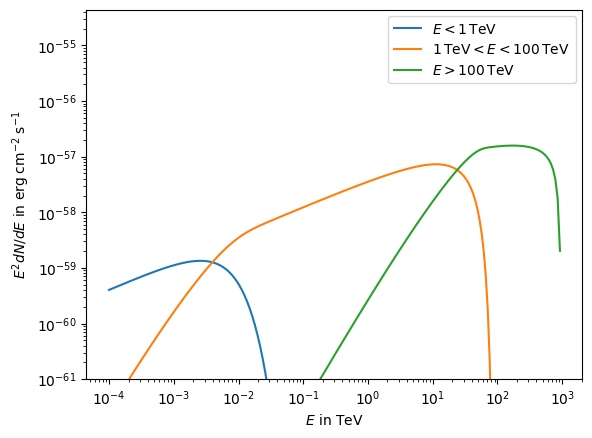

In [9]:
plt.loglog(Es_below_1_TeV[:173]/gp.TeV_to_erg,(Es_below_1_TeV[:173])**2*ic_spec_below_1_TeV[:173],label="$E<1\,\mathrm{TeV}$")
plt.loglog(Es_1_100_TeV[:199]/gp.TeV_to_erg,(Es_1_100_TeV[:199])**2*ic_spec_1_100_TeV[:199],label="$1\,\mathrm{TeV}<E<100\,\mathrm{TeV}$")
plt.loglog(Es_above_100_TeV[:199]/gp.TeV_to_erg,(Es_above_100_TeV[:199])**2*ic_spec_above_100_TeV[:199],label="$E>100\,\mathrm{TeV}$")
plt.ylim(bottom=1e-61)

plt.xlabel("$E$ in TeV")
plt.ylabel("$E^2dN/dE$ in $\mathrm{erg}\;\mathrm{cm}^{-2}\;\mathrm{s}^{-1}$")
plt.legend()

So we see that electrons with energies betwen 1 and 100 TeV dominate between about 5 GeV and 10 TeV

Now the same with synchreotron radiation

(1e-61, 1.7989109885914934e-39)

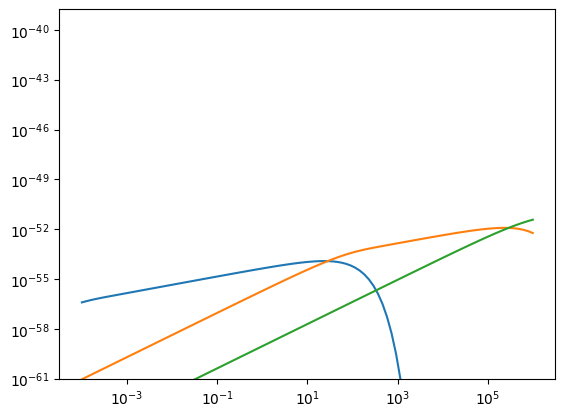

In [27]:
plt.loglog(synchrotron_energies[:86]/gp.eV_to_erg,(synchrotron_energies[:86])**2*sync_spec_below_1_TeV[:86],label="$E<1\,\mathrm{TeV}$")
plt.loglog(synchrotron_energies/gp.eV_to_erg,(synchrotron_energies)**2*sync_spec_1_100_TeV,label="$1\,\mathrm{TeV}<E<100\,\mathrm{TeV}$")
plt.loglog(synchrotron_energies/gp.eV_to_erg,(synchrotron_energies)**2*sync_spec_above_100_TeV,label="$E>100\,\mathrm{TeV}$")
plt.ylim(bottom=1e-61,top=1e-50)
plt.xlabel("$E$ in eV")
plt.ylabel("$E^2dN/dE$ in $\mathrm{erg}\;\mathrm{cm}^{-2}\;\mathrm{s}^{-1}$")
plt.legend()

For synchrotron radaition, electrons with energies between 1 and 100 TeV emit primarily between 10 eV and 100 keV

And now we do the same thing for protons and pp-Interactions

In [28]:
def hadronic_spectrum_Emin_Emax(Emin,Emax):#Emin,Emax in TeV

    e = np.geomspace(Emin,Emax,200) * gp.TeV_to_erg # energy axis
    power_law = e**-2 # define power law
    particles = list(zip(e,power_law)) # input needs to be 2D-array
    fr = gp.Radiation()

    fr.SetAmbientDensity(1)

    fr.SetDistance(2000)#parsec
    fr.SetProtons(particles)
    gamma_ray_energies=np.geomspace(1e8,Emax*1e12,200) * gp.eV_to_erg#This needs to be very fine
    fr.CalculateDifferentialPhotonSpectrum(gamma_ray_energies)
    pp_spec=np.array(fr.GetPPSpectrum())[:,1]
    return pp_spec, gamma_ray_energies

In [29]:
pp_spec_below_1_TeV,Es_below_1_TeV=hadronic_spectrum_Emin_Emax(1e-3,1)
pp_spec_1_100_TeV,Es_1_100_TeV=hadronic_spectrum_Emin_Emax(1,100)
pp_spec_above_100_TeV,Es_above_100_TeV=hadronic_spectrum_Emin_Emax(100,1000)

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    200 / 200 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    200 / 200 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    200 / 200 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.



(1e-61, 1.2505097369869324e-60)

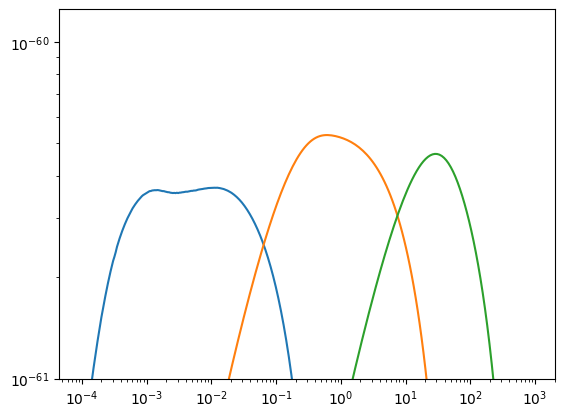

In [30]:
plt.loglog(Es_below_1_TeV[:199]/gp.TeV_to_erg,(Es_below_1_TeV[:199])**2*pp_spec_below_1_TeV[:199],label="$E<1\,\mathrm{TeV}$")
plt.loglog(Es_1_100_TeV[:199]/gp.TeV_to_erg,(Es_1_100_TeV[:199])**2*pp_spec_1_100_TeV[:199],label="$1\,\mathrm{TeV}<E<100\,\mathrm{TeV}$")
plt.loglog(Es_above_100_TeV[:199]/gp.TeV_to_erg,(Es_above_100_TeV[:199])**2*pp_spec_above_100_TeV[:199],label="$E>100\,\mathrm{TeV}$")
plt.ylim(bottom=1e-61)

plt.xlabel("$E$ in eV")
plt.ylabel("$E^2dN/dE$ in $\mathrm{erg}\;\mathrm{cm}^{-2}\;\mathrm{s}^{-1}$")

plt.legend()

In this case, protons with energies between 1 and 100 TeV dominate the emission between 50 GeV and 5 TeV